Importing the Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

Importing the Data

In [19]:
df_attom = pd.read_csv("C:/Users/jeetp/Documents/00A. Academics/01. Machine Learning/01. Project/Codes/Attom_Data_Clean.csv", index_col=False)
df_attom.head()

,summary.propsubtype,summary.yearbuilt,building.size.bldgsize,building.size.groundfloorsize,building.rooms.bathsfull,building.rooms.beds,building.rooms.roomsTotal,building.construction.condition,building.construction.constructiontype,building.construction.wallType,...,assessment.tax.taxamt,assessment.tax.taxyear,location.latitude,location.longitude,building.size.bldgsize.1,building.parking.prkgSize,assessment.assessed.assdimprvalue,assessment.market.mktttlvalue.1,assessment.tax.taxamt.1,assessment.tax.taxyear.1
0,Residential,1973.0,1860.0,1135.0,1.0,4.0,7.0,AVERAGE,FRAME,BRICK VENEER,...,4505.62,2022.0,40.006312,-105.252516,608.0,216.0,17389.0,663700.0,4505.62,2022.0
1,Residential,1993.0,504.0,504.0,1.0,1.0,3.0,GOOD,FRAME,MARBLECRETE,...,1664.50,2022.0,39.996795,-105.235725,903.0,180.0,22251.0,257900.0,1664.50,2022.0
2,Residential,1979.0,1372.0,637.0,1.0,3.0,5.0,AVERAGE,FRAME,MARBLECRETE,...,2978.64,2022.0,39.900953,-105.242195,2061.0,NaN,21694.0,437100.0,2978.64,2022.0
3,Residential,1977.0,1014.0,1014.0,1.0,3.0,6.0,AVERAGE,FRAME,MARBLECRETE,...,3347.88,2022.0,39.909154,-105.252272,1539.0,NaN,25849.0,491900.0,3347.88,2022.0
4,Residential,1982.0,1797.0,1797.0,1.0,4.0,6.0,AVERAGE,FRAME,MARBLECRETE,...,3938.38,2022.0,39.999509,-105.237190,1122.0,190.0,42986.0,636300.0,3938.38,2022.0


In [21]:
df_attom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8653 entries, 0 to 8652
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   summary.propsubtype                     1000 non-null   object 
 1   summary.yearbuilt                       999 non-null    float64
 2   building.size.bldgsize                  999 non-null    float64
 3   building.size.groundfloorsize           999 non-null    float64
 4   building.rooms.bathsfull                993 non-null    float64
 5   building.rooms.beds                     993 non-null    float64
 6   building.rooms.roomsTotal               993 non-null    float64
 7   building.construction.condition         999 non-null    object 
 8   building.construction.constructiontype  999 non-null    object 
 9   building.construction.wallType          994 non-null    object 
 10  building.parking.garagetype             765 non-null    obje

Formatting Data for CLustering, Keeping only Numeric Data

In [27]:
#df_new = df_attom.drop(["summary.propsubtype", "building.construction.condition", "building.construction.constructiontype", "building.construction.wallType", "building.parking.garagetype", "vintage.lastModified"], axis =1)
df_clust = df_attom[["building.size.bldgsize", "building.size.groundfloorsize", "assessment.market.mktttlvalue", "assessment.tax.taxamt", "location.latitude", "location.longitude", "building.size.bldgsize", "building.parking.prkgSize", "assessment.assessed.assdimprvalue", "assessment.market.mktttlvalue", "assessment.tax.taxamt"]]
df_clust

,building.size.bldgsize,building.size.groundfloorsize,assessment.market.mktttlvalue,assessment.tax.taxamt,location.latitude,location.longitude,building.size.bldgsize,building.parking.prkgSize,assessment.assessed.assdimprvalue,assessment.market.mktttlvalue,assessment.tax.taxamt
0,1860.0,1135.0,663700.0,4505.62,40.006312,-105.252516,1860.0,216.0,17389.0,663700.0,4505.62
1,504.0,504.0,257900.0,1664.50,39.996795,-105.235725,504.0,180.0,22251.0,257900.0,1664.50
2,1372.0,637.0,437100.0,2978.64,39.900953,-105.242195,1372.0,NaN,21694.0,437100.0,2978.64
3,1014.0,1014.0,491900.0,3347.88,39.909154,-105.252272,1014.0,NaN,25849.0,491900.0,3347.88
4,1797.0,1797.0,636300.0,3938.38,39.999509,-105.237190,1797.0,190.0,42986.0,636300.0,3938.38
...,...,...,...,...,...,...,...,...,...,...,...
8648,NaN,NaN,NaN,NaN,40.010928,-105.247692,NaN,NaN,2955042.0,NaN,NaN
8649,NaN,NaN,NaN,NaN,40.013579,-105.206871,NaN,NaN,522.0,NaN,NaN
8650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1421.0,NaN,NaN


In [29]:
df_clust = df_clust.dropna()
df_clust

,building.size.bldgsize,building.size.groundfloorsize,assessment.market.mktttlvalue,assessment.tax.taxamt,location.latitude,location.longitude,building.size.bldgsize,building.parking.prkgSize,assessment.assessed.assdimprvalue,assessment.market.mktttlvalue,assessment.tax.taxamt
0,1860.0,1135.0,663700.0,4505.62,40.006312,-105.252516,1860.0,216.0,17389.0,663700.0,4505.62
1,504.0,504.0,257900.0,1664.50,39.996795,-105.235725,504.0,180.0,22251.0,257900.0,1664.50
4,1797.0,1797.0,636300.0,3938.38,39.999509,-105.237190,1797.0,190.0,42986.0,636300.0,3938.38
6,1019.0,1019.0,751400.0,5096.60,39.944917,-105.250610,1019.0,596.0,140276.0,751400.0,5096.60
7,1363.0,1696.0,405000.0,10906.88,40.015865,-105.247994,1363.0,200.0,33197.0,405000.0,10906.88
...,...,...,...,...,...,...,...,...,...,...,...
995,1880.0,1155.0,637400.0,4328.46,39.970237,-105.187327,1880.0,1066.0,67203.0,637400.0,4328.46
996,1644.0,1644.0,667300.0,4529.86,40.011734,-105.210555,1644.0,220.0,25370.0,667300.0,4529.86
997,2251.0,1306.0,584700.0,3973.28,39.986169,-105.172371,2251.0,500.0,44673.0,584700.0,3973.28
998,887.0,887.0,332500.0,2273.72,39.989959,-105.166540,887.0,750.0,90654.0,332500.0,2273.72


Finding the Number of CLusters

Elbow Method to find K

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


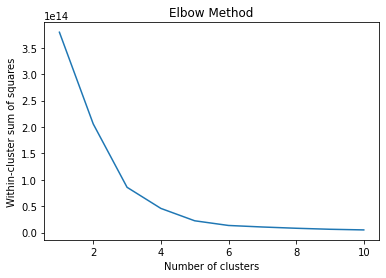

In [37]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clust)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

silhouette Method for finding K

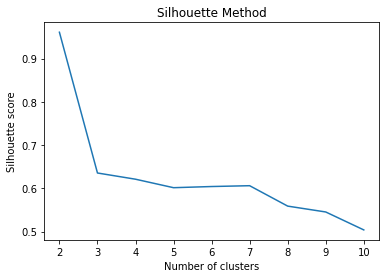

In [43]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df_clust)
    silhouette_avg = silhouette_score(df_clust, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

As both the Elbow and Silhouette Method suggests K=3

K-Means with K=3

In [49]:
# Perform K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_clust)

# Print the cluster centers and the cluster labels for each observation
print('Cluster centers:')
print(kmeans.cluster_centers_)
print('Cluster labels:')
print(cluster_labels)

Cluster centers:
[[ 2.66284817e+03  1.77546597e+03  1.07244945e+06  7.62682387e+03
   4.00011818e+01 -1.05227356e+02  2.66284817e+03  4.74324607e+02
   3.38348953e+04  1.07244945e+06  7.62682387e+03]
 [ 6.12050000e+04  6.12050000e+04  9.90000000e+06  2.66612530e+05
   3.99906500e+01 -1.05234486e+02  6.12050000e+04  4.40000000e+02
   7.76500000e+03  9.90000000e+06  2.66612530e+05]
 [ 1.17566104e+03  8.78874233e+02  4.35097089e+05  2.92749802e+03
   3.99991440e+01 -1.05225261e+02  1.17566104e+03  4.85173313e+02
   3.54084847e+04  4.35097089e+05  2.92749802e+03]]
Cluster labels:
[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2
 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 0 2 2 2 2 2

K-Means with K=2

In [50]:
# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_clust)

# Print the cluster centers and the cluster labels for each observation
print('Cluster centers:')
print(kmeans.cluster_centers_)
print('Cluster labels:')
print(cluster_labels)

Cluster centers:
[[ 1.51261566e+03  1.08201661e+03  5.79503139e+05  3.99223259e+03
   3.99996057e+01 -1.05225735e+02  1.51261566e+03  4.82715302e+02
   3.50519537e+04  5.79503139e+05  3.99223259e+03]
 [ 6.12050000e+04  6.12050000e+04  9.90000000e+06  2.66612530e+05
   3.99906500e+01 -1.05234486e+02  6.12050000e+04  4.40000000e+02
   7.76500000e+03  9.90000000e+06  2.66612530e+05]]
Cluster labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


K-Means with K=4

In [51]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_clust)

# Print the cluster centers and the cluster labels for each observation
print('Cluster centers:')
print(kmeans.cluster_centers_)
print('Cluster labels:')
print(cluster_labels)

Cluster centers:
[[ 5.65553846e+03  5.04769231e+03  2.23810077e+06  2.34973323e+04
   3.99972651e+01 -1.05229079e+02  5.65553846e+03  4.35153846e+02
   2.12640000e+04  2.23810077e+06  2.34973323e+04]
 [ 2.27424268e+03  1.44676987e+03  9.14282360e+05  5.99429397e+03
   4.00014698e+01 -1.05228220e+02  2.27424268e+03  4.65841004e+02
   3.40756778e+04  9.14282360e+05  5.99429397e+03]
 [ 1.11348393e+03  8.47279188e+02  4.07635113e+05  2.75355413e+03
   3.99989033e+01 -1.05224657e+02  1.11348393e+03  4.90585448e+02
   3.57500474e+04  4.07635113e+05  2.75355413e+03]
 [ 6.12050000e+04  6.12050000e+04  9.90000000e+06  2.66612530e+05
   3.99906500e+01 -1.05234486e+02  6.12050000e+04  4.40000000e+02
   7.76500000e+03  9.90000000e+06  2.66612530e+05]]
Cluster labels:
[1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 2 2 0 1 2 1 2 2 2 2 2
 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 